# 1. Dataset

We will be using a public data set in Kaggle in csv format. This Dataset is Google Play Store Apps.

To import the dataset to the current environment do the following steps:

1. Click "+ Add Data" in the top right corner of this Kaggle notebook.
1. Search "Google Play" in the search box.
1. Click Add on the first record (uploaded by Lavanda Gupta).
1. There will be a new folder in /kaggle/input/ containing the dataset.


Jupyter Magic Commands:
You can execute linux shell commands in this notebook by preceding the command with '!' character.

to list files in the current directory you can execute in a cell: 
 
    !ls -la


In [ ]:
!pwd



## Importing libraries

In [51]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 2. Acquire data

In [52]:
# First challenge: Try to read the csv files and store them in 2 diferent dataframes dataframe
df_reviews = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
df_apps = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")


# 3. Intro: Wrangle, prepare, cleanse the data.

## Explore data

We will be focusing on the Apps dataset, leaving the Reviews one for the more advanced training

In [53]:
# Visualizing first 5 rows of the dataset
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
# Dimensions of the apps dataframe: 3 columns, 10841 samples
df_apps.shape

(10841, 13)

In [55]:
# Types of each column
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [56]:
# Statistics of the dataframe. Only numerical columns are taken into account
df_apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [57]:
# if we want to rename a column df_apps.rename(columns={'App':'App Name'}, inplace=True)

It's often useful to delete (drop) the columns that we are not going to use. We free up memory and also analytical complexity.

In [58]:
#Let's drop for instance the version of the app, which for our analysis is not going to be useful.
df_apps = df_apps.drop("Current Ver", axis=1)

#The axis parameter determines whether we are dropping a column (1) or a row (0). 0 is default.

In [59]:
# How many unique values has Category column have?
df_apps.Category.nunique()

34

In [60]:
#List the unique values for Category
df_apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [61]:
#Alternative way to refer to a Pandas Series
df_apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [62]:
df_apps.loc[df_apps.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,NaN


In [63]:
#We need to drop this sample as it's clearly corrupted.
df_apps = df_apps.drop(10472).reset_index().drop("index", axis=1)

In [64]:
#Let's identify more corrupt entries with data that we know should not be possible

#First we create the mask
mask = df_apps.Rating < 0
mask

0        False
1        False
2        False
3        False
4        False
         ...  
10835    False
10836    False
10837    False
10838    False
10839    False
Name: Rating, Length: 10840, dtype: bool

In [65]:
df_apps.loc[mask]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver


### Part 3 exercises



In [66]:
# What are all the possible values of Size and Installs?
print(df_apps['Installs'].unique())
#print(df_apps['Size'].unique())


['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [67]:
#df_apps['Installs'].value_counts().plot(kind='bar', figsize=(15, 5))

In [68]:
#Write some python code that prints the number of unique values for each column
for column in df_apps.columns:
    print("In column "+column+": "+ str(df_apps[column].nunique()) + " unique values.")

In column App: 9659 unique values.
In column Category: 33 unique values.
In column Rating: 39 unique values.
In column Reviews: 6001 unique values.
In column Size: 461 unique values.
In column Installs: 21 unique values.
In column Type: 2 unique values.
In column Price: 92 unique values.
In column Content Rating: 6 unique values.
In column Genres: 119 unique values.
In column Last Updated: 1377 unique values.
In column Android Ver: 33 unique values.


In [69]:
#What percentage of apps are free?
df_apps.loc[df_apps['Type']=='Free'].shape[0] / df_apps.shape[0]

0.9261070110701107

In [70]:
# Print the last 10 rows of the dataset
df_apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device


In [71]:
# Drop "Android Ver" and "Genres" column. Try to do it in a single command.
df_apps = df_apps.drop(["Android Ver", "Genres"], axis=1)

**Extra exercise: We seem to have an issue with reviews. If you look into the info() output, we can see its type is *object*. Reviews can be definitely quantified, so we need to change it to integer to continue developing our analysis. **

In [72]:
df_apps = df_apps.astype({'Reviews': 'int32'})

In [73]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 10 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int32
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null object
dtypes: float64(1), int32(1), object(8)
memory usage: 804.7+ KB


-- END OF EXERCISES --

In [74]:
# Let's see what fields are included in the other dataframe
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## 4. Analyze, identify patterns, and explore the data.

### Type

In our previous analysis (and also, because we have phones and apps ourselves) we know there are 2 types of app: Free and Paid. Not many people like to pay for apps, so we also analyzed that there are many more Free apps in the marketplace than paid. Let's visualize it.

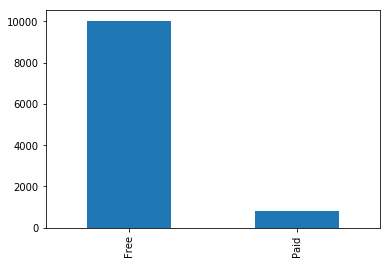

In [75]:
df_apps['Type'].value_counts().plot(kind="bar")

In [76]:
#Let's also go into the Rating of our apps. We have been tasked to plot the average rating of our apps per each of the categories
#First, let's select the subset of our dataframe that we are interested in.
df_cat_rating = df_apps[['Category','Rating']]
df_cat_rating.head()

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3


In [77]:
#Now let's calculate the mean for each 
df_rating_per_category = df_cat_rating.groupby('Category').mean()
df_rating_per_category.head()

,Rating
Category,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452


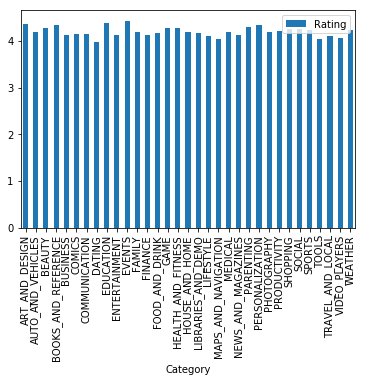

In [78]:
#Let's plot it now to see what's the result
df_rating_per_category.plot(kind='bar')

In [79]:
#What issue(s) do we see in this visualization?

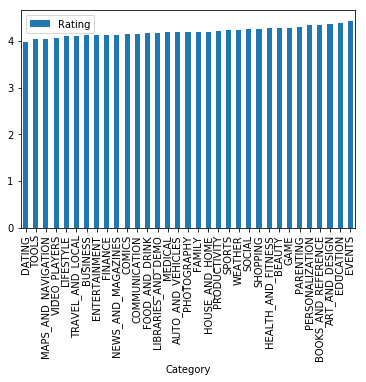

In [80]:
df_rating_per_category_ordered = df_rating_per_category.sort_values("Rating")
df_rating_per_category_ordered.plot(kind="bar")
'''Still we have some issues.:
      1.- Most apps' ratings range from around 3.8 to 4.8.
      2.- The chart itself is very squished. We need more space. ''';

(3.5, 5)

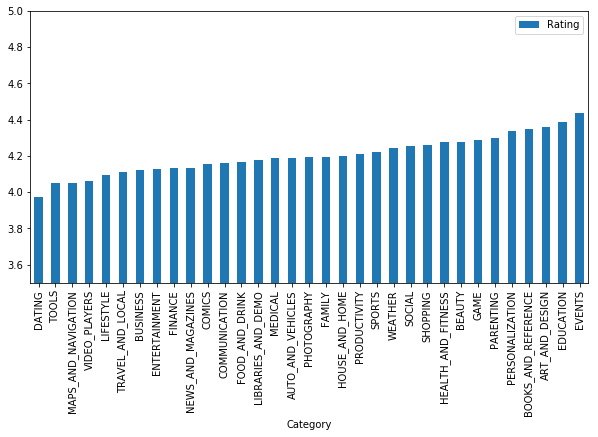

In [81]:
ax1 = df_rating_per_category_ordered.plot(kind='bar', figsize=(10,5))
ax1.set_ylim(3.5,5)

Exercises part 4

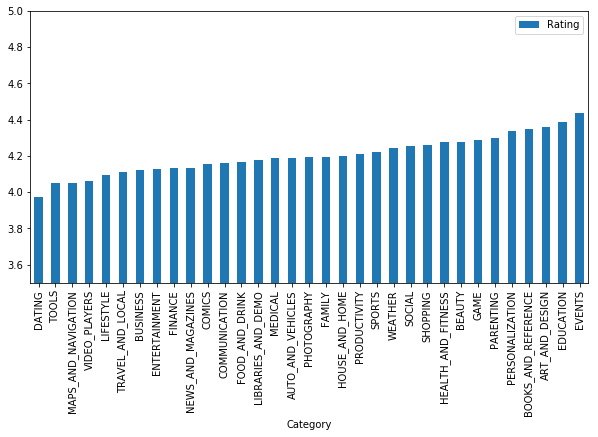

In [82]:
#Exercise: try to plot the above chart using only df_apps and in 2 lines of code.
ax1 = df_apps[['Category','Rating']]\
        .groupby('Category').mean()\
        .sort_values("Rating")\
        .plot(kind="bar", figsize=(10,5))
ax1.set_ylim(3.5,5);


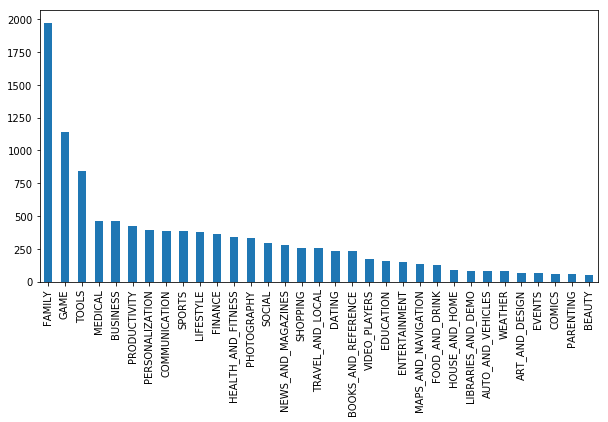

In [83]:
#Visualize in a bar chart the amount of apps per category
df_apps['Category'].value_counts().plot(kind='bar', figsize=(10,5))

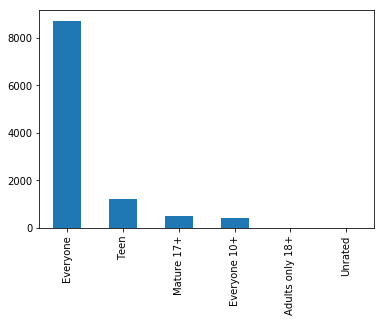

In [84]:
#Visualize in a bar chart the amount of apps per Content Rating in our dataset.
df_apps['Content Rating'].value_counts().plot(kind='bar')

End of exercises part 4

Let's see a different type of plot: the line plot.

In [85]:
#Casting into datetime
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'])
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 10 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int32
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 804.7+ KB


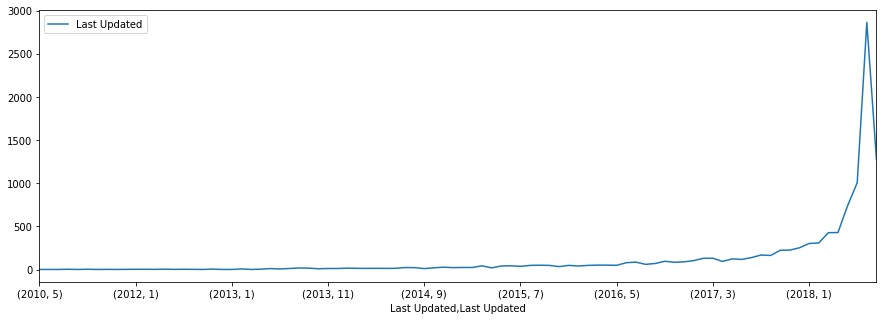

In [86]:
#Example of a lineplot. We see that the apps in our dataset were updated usually by a few months of the collection of the data (end of the lineplot)

df_apps[['Last Updated']]\
    .groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).count()\
    .plot(kind='line', figsize=(15, 5))


## 5. Data transformations.


In [87]:
#Let's focus in the size of the app. If we are going to use this data in the future or quantify the size somehow, we need to do some arrangements.
df_apps[['Size']].head(15)

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
5,5.6M
6,19M
7,29M
8,33M
9,3.1M


In [88]:
df_apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [89]:
#Let's simply cast it into an integer, and it should be fine.
df_apps.astype({'Size':'int32'})

ValueError: invalid literal for int() with base 10: '19M'

In [90]:
#... right? As we saw up there, we need to do some arrangements.
# First, we need to make our strings 'look like' numbers.

#We present you guys with the fuction apply:
df_apps['Size'] = df_apps['Size'].apply(size_to_int)

In [ ]:
def size_to_int(n):
    return 0

In [ ]:
def size_to_int(n):
    lastchar = n[-1:]
    if 'M' == lastchar:
        n = float(n[:-1])*1000
    elif 'k' == lastchar:
        n = float(n[:-1])
    else:
        n = None
    return n

In [91]:
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,2018-06-20
...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,2017-07-25
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,2018-07-06
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,"1,000+",Free,0,Everyone,2017-01-20
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,2015-01-19


In [92]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 10 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int32
Size              9145 non-null float64
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 804.7+ KB


Now we can see some statistics about the size.

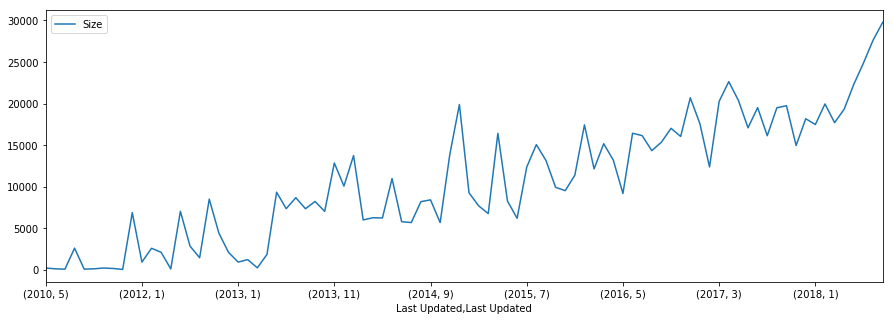

In [93]:
#We can see how the average size of apps has increased consistently with the years.

df_apps[['Last Updated', 'Size']]\
    .groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).mean()\
    .plot(kind='line', figsize=(15, 5))


In [94]:
#add visualization de un mes en particular (el ultimo por ejemplo) en el que tambien metemos la media, desviacion tipica, grafica, etc.

In [95]:
#We should check if we have duplicates in our dataset and get rid of them.
duplicated_mask = df_apps.duplicated()
df_apps[duplicated_mask]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,"5,000,000+",Free,0,Everyone,2018-02-26
236,Box,BUSINESS,4.2,159872,NaN,"10,000,000+",Free,0,Everyone,2018-07-31
239,Google My Business,BUSINESS,4.4,70991,NaN,"5,000,000+",Free,0,Everyone,2018-07-24
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,"10,000,000+",Free,0,Everyone,2018-07-20
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,"1,000,000+",Free,0,Everyone,2018-07-16
...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,"10,000,000+",Free,0,Everyone,2018-04-06
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,"1,000,000+",Free,0,Everyone,2018-08-06
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,"100,000,000+",Free,0,Everyone,2018-06-27
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,"10,000+",Free,0,Everyone,2018-06-01


In [96]:
df_apps[df_apps['App']=='TickTick: To Do List with Reminder, Day Planner']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
3499,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,"1,000,000+",Free,0,Everyone,2018-08-06
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,"1,000,000+",Free,0,Everyone,2018-08-06


In [ ]:
#Let's drop the duplicates
df_apps = df_apps.drop_duplicates()

Right now, our dataframe schema looks like this:

    class 'pandas.core.frame.DataFrame'>
    class 'pandas.core.frame.DataFrame'>
    Int64Index: 10357 entries, 0 to 10839
    Data columns (total 10 columns):
    App               10357 non-null object
    Category          10357 non-null object
    Rating            8892 non-null float64
    Reviews           10357 non-null int32
    Size              10357 non-null int64
    Installs          10357 non-null object
    Type              10356 non-null object
    Price             10357 non-null object
    Content Rating    10357 non-null object
    Last Updated      10357 non-null datetime64[ns]
    dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(6)
    memory usage: 849.6+ KB


Exercise: Make the necessary adjustments so we can convert Installs and Price to Integer columns.

In [ ]:
df_apps.info()